<a href="https://colab.research.google.com/github/rohanmengade/Machine-Learning/blob/master/Potato_Disease_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!unzip /content/drive/MyDrive/Potato-disease/PlantVillage.zip

Archive:  /content/drive/MyDrive/Potato-disease/PlantVillage.zip
   creating: PlantVillage/Potato___Early_blight/
  inflating: PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG  
  inflating: PlantVillage/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG  
  inflating: PlantVillage/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG  
  inflating: PlantVillage/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG  
  inflating: PlantVillage/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG  
  inflating: PlantVillage/Potato___Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG  
  inflating: PlantVillage/Potato___Early_blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG  
  inflating: PlantVillage/Potato___Early_blight/028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG  
  inflating: P

In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [7]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [8]:
dataset=tf.keras.preprocessing.image_dataset_from_directory( 
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
len(dataset) # 32*68, as dataset has 32 batches of images 

68

In [11]:
for image_batch, label_batch in dataset.take(1):  # see image 1 in batch 1 and converted to numpy from tensor (originally)
    print(image_batch[0].numpy())

[[[ 89.  85.  99.]
  [172. 168. 182.]
  [120. 116. 130.]
  ...
  [152. 157. 176.]
  [152. 157. 176.]
  [152. 157. 176.]]

 [[138. 134. 148.]
  [135. 131. 145.]
  [106. 102. 116.]
  ...
  [154. 159. 178.]
  [155. 160. 179.]
  [155. 160. 179.]]

 [[145. 141. 155.]
  [170. 166. 180.]
  [115. 111. 125.]
  ...
  [154. 159. 178.]
  [154. 159. 178.]
  [154. 159. 178.]]

 ...

 [[151. 147. 161.]
  [147. 143. 157.]
  [119. 115. 129.]
  ...
  [200. 202. 214.]
  [196. 198. 210.]
  [194. 196. 208.]]

 [[ 87.  83.  97.]
  [136. 132. 146.]
  [138. 134. 148.]
  ...
  [185. 187. 199.]
  [178. 180. 192.]
  [177. 179. 191.]]

 [[126. 122. 136.]
  [114. 110. 124.]
  [143. 139. 153.]
  ...
  [192. 194. 206.]
  [193. 195. 207.]
  [199. 201. 213.]]]


In [12]:
for image_batch, label_batch in dataset.take(1):   # 32 images in batch 1, 256*256 size, RGB=3, and labels as per 3 classes  
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 0 2 0 1 1 1 1 0 0 0 0 0 0 0 0 0 2 0 0 0 1 2 1 0 2 0 1 0 1]


visualize some of the images with labels

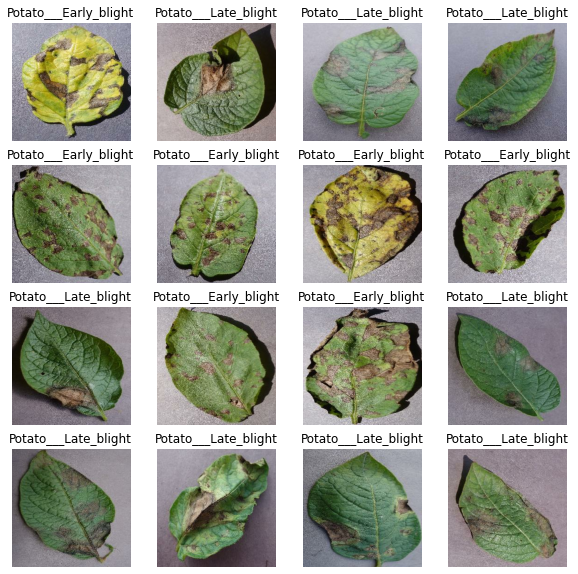

In [13]:
plt.figure(figsize=(10,10)) # increase the height and width of plot
for image_batch, label_batch in dataset.take(1):
    for i in range(16):
        ax=plt.subplot(4,4,i+1) # to show all the 16 images 
        plt.imshow(image_batch[i].numpy().astype("uint8")) # change from flaot to int to display
        plt.axis("off") 
        plt.title(class_names[label_batch[i]]) # display labels given index class_names

Training, validation and testing datsets

In [14]:
len(dataset)

68

In [15]:
#training = 80%
#validation= 10%
#test = 10% 

In [16]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [17]:
train_ds=dataset.take(54) #in tf it is used similar to sklearn train,test split
len(train_ds)

54

In [18]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [19]:
val_size=0.1
val_ds = len(dataset)*val_size
val_ds

6.800000000000001

In [20]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [21]:
test_ds = test_ds.skip(6)
len(test_ds)

8

we will write fucntion for train test split here

In [22]:
def get_dataset_partition_df(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=100000):
    
    ds_size=len(ds)
    
    if shuffle:
        ds.shuffle(shuffle_size, seed=12)
    train_size=int(0.8 * ds_size)
    val_size=int(0.1 * ds_size)
    
    train_ds=ds.take(train_size) # tf take to take trianing data from dataset
    val_ds=ds.skip(train_size).take(val_size) #data remaining after train, from that take validation data 
    test_ds=ds.skip(train_size).skip(val_size) #skip to remaing data from test data
    
        
    
    return train_ds, val_ds, test_ds 

In [23]:
train_ds, val_ds, test_ds = get_dataset_partition_df(dataset)

In [24]:
len(train_ds)

54

In [25]:
len(val_ds)

6

In [26]:
len(test_ds)

8

In [27]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) # to make most of memory and optimize the datasets processing
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),   # to resize images inprediction if user has diff size image
    layers.experimental.preprocessing.Rescaling(1.0/255)    #scale images from 0-255 to 0 to 1, therefore divide by 255             
])

data augmentation for making model robust

In [29]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"), # flipping images for more images data
    layers.experimental.preprocessing.RandomRotation(0.2) #rotaitng images        
])

In [30]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

model building

In [31]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [33]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [34]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 34s 399ms/step - loss: 0.9047 - accuracy: 0.5162 - val_loss: 0.8221 - val_accuracy: 0.6146
Epoch 2/50
54/54 [==============================] - 18s 326ms/step - loss: 0.7083 - accuracy: 0.6609 - val_loss: 0.4917 - val_accuracy: 0.7812
Epoch 3/50
54/54 [==============================] - 18s 326ms/step - loss: 0.5404 - accuracy: 0.7541 - val_loss: 0.5948 - val_accuracy: 0.6719
Epoch 4/50
54/54 [==============================] - 18s 330ms/step - loss: 0.3400 - accuracy: 0.8455 - val_loss: 0.5291 - val_accuracy: 0.7656
Epoch 5/50
54/54 [==============================] - 18s 330ms/step - loss: 0.4093 - accuracy: 0.8345 - val_loss: 0.2731 - val_accuracy: 0.8750
Epoch 6/50
54/54 [==============================] - 18s 326ms/step - loss: 0.2285 - accuracy: 0.9062 - val_loss: 0.2508 - val_accuracy: 0.8854
Epoch 7/50
54/54 [==============================] - 18s 325ms/step - loss: 0.2049 - accuracy: 0.9161 - val_loss: 0.1755 - val_accuracy: 0.9323

In [35]:
scores = model.evaluate(test_ds) #check test data accuracy

8/8 [==============================] - 7s 112ms/step - loss: 0.0245 - accuracy: 0.9914


In [36]:
scores #loss and accuracy of test data

[0.024456476792693138, 0.9913793206214905]

In [37]:
#Plotting the Accuracy and Loss Curves

In [38]:
history

In [40]:
history.params

{'epochs': 50, 'steps': 54, 'verbose': 1}

In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [42]:
type(history.history['loss'])

list

In [43]:
len(history.history['loss']) #history variable is list having 50 items

50

In [44]:
history.history['loss'][:5] # show loss for first 5 epochs


[0.9047397375106812,
 0.7083349823951721,
 0.540433406829834,
 0.33999067544937134,
 0.4092983603477478]

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

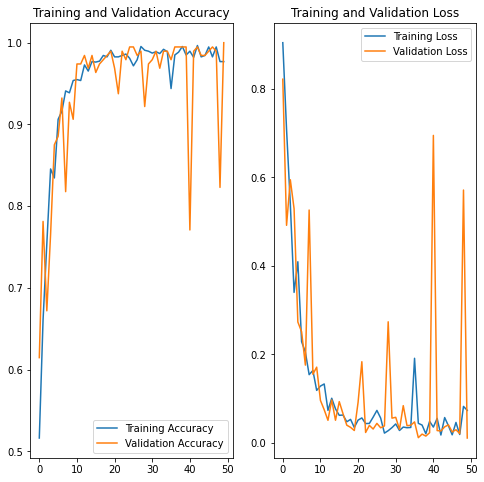

In [47]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [48]:
#Run prediction on a sample image

first image to predict
actual label: Potato___healthy
predicted label: Potato___healthy


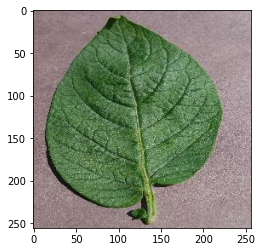

In [49]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [51]:
#Write a function for inference

In [53]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [54]:
#Now run inference on few sample images

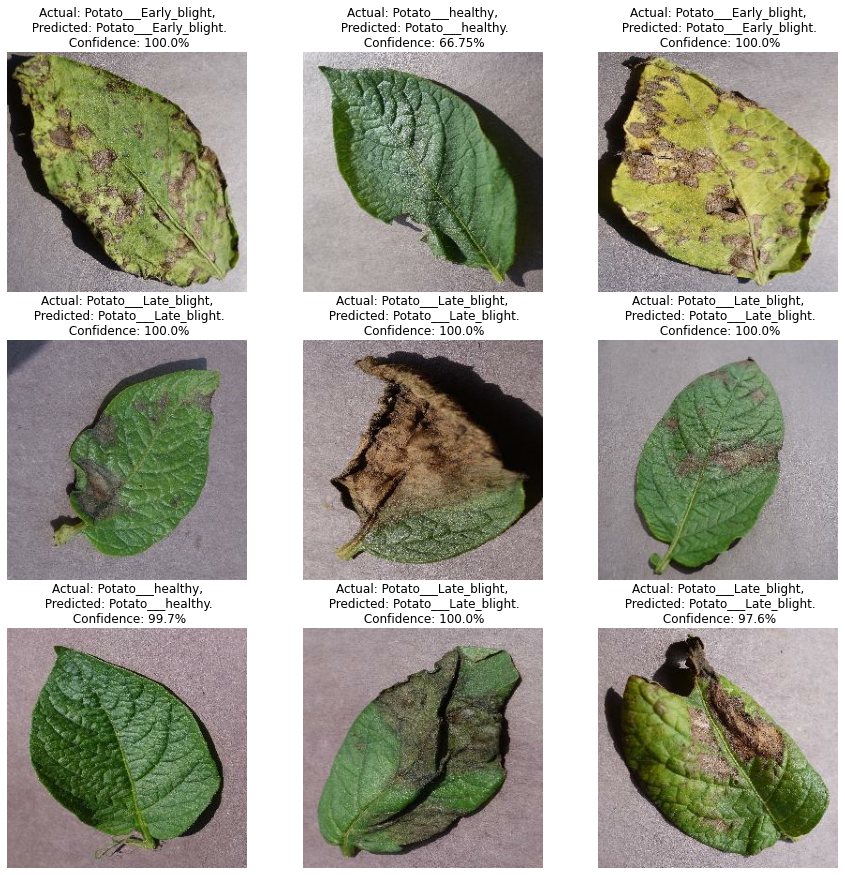

In [55]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [61]:
model_version=1
model.save('../models/{model_version}')

INFO:tensorflow:Assets written to: ../models/{model_version}/assets
